# ЛР1 (регрессия)

## Подготовка ноутбука

In [1]:
!pip install numpy==1.19.0
!pip install matplotlib==3.3.0
!pip install seaborn==0.11.0
!pip install pandas==1.0.0

In [2]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

## Загрузка датасета

In [3]:
from sklearn.datasets import load_boston

boston_data = load_boston()

In [4]:
feature_data = boston_data['data']
feature_names = boston_data['feature_names']
target_data = boston_data['target']

In [5]:
df = pd.DataFrame(feature_data, columns=boston_data['feature_names'])
df['PRICE'] = target_data

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Обзор данных

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [9]:
# делаем признак с рекой категориальным
df['CHAS'] = df['CHAS'].astype(int).astype(dtype='category')

## Создание и оценка baseline модели

In [10]:
# полезности из sklearn (разделение данных на выборки, модель, метрики)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
# Разделение выборки
X_train, X_test, y_train, y_test = train_test_split(
    df[feature_names],
    df['PRICE'], 
    train_size=0.7, 
    random_state=RANDOM_STATE
)

In [12]:
# Обучение модели
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Функция для отображения весов
def show_linear_model_weights(model, feature_names=None):
    '''
    Отображение весов
    Аргументы:
        model - модель линейной регрессии
        feature_names - (опционально) если передано, отображение весов вместе с именами признаков
    '''
    print('\n----- Weights -----')
    if feature_names is None:  
        print(f'Weights: {model.coef_}')
    else:
        pairs = zip(feature_names, model.coef_)
        for pair in pairs:
            print(f'{pair[0]} | {pair[1]}')

    print(f'Bias: {model.intercept_}')

In [14]:
# Отображение весов полученной модели
show_linear_model_weights(reg, X_train.columns)


----- Weights -----
CRIM | -0.13347010285294725
ZN | 0.03580891359323623
INDUS | 0.049522645220052244
CHAS | 3.119835116285423
NOX | -15.417060895306776
RM | 4.057199231645376
AGE | -0.010820835184924181
DIS | -1.3859982431608782
RAD | 0.24272733982225161
TAX | -0.008702234365661957
PTRATIO | -0.9106852081102905
B | 0.011794115892575245
LSTAT | -0.5471133128239536
Bias: 31.631084035691863


In [15]:
# Функция для отображения предсказаний модели и реальных значений
def draw_predictions_plot(y_pred, y_true):
    plt.scatter(y_pred, y_true, c='red', s=4**2)
    line_pnts = np.linspace(np.amin(y_pred), np.amax(y_pred), 2)
    plt.plot(line_pnts, line_pnts, 'k--', lw=1)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.grid()

In [16]:
# Получение предсказанных значений
y_pred = reg.predict(X_test)

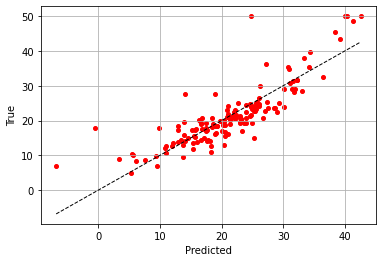

In [17]:
# Отображение графика
draw_predictions_plot(y_pred, y_test)

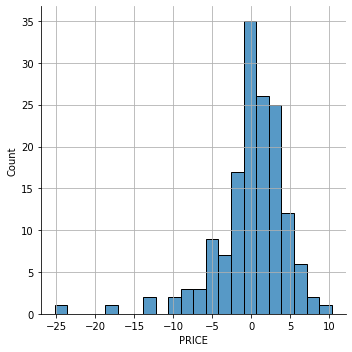

In [18]:
# График распределения ошибок
y_residuals = y_pred-y_test
sns.displot(y_residuals)
plt.grid()

In [19]:
# Функция для отображения метрик модели
def evaluate_regressor(reg, X, y, mode):
    y_pred = reg.predict(X)
    r2_score_value = r2_score(y, y_pred)
    rmse_score = np.sqrt(mean_squared_error(y, y_pred))
    mae_score = mean_absolute_error(y, y_pred)

    print(f'\n----- Evaluation for {mode} -----')
    print(f'  R2: {r2_score_value}')
    print(f'  RMSE: {rmse_score}')
    print(f'  MAE: {mae_score}')

In [20]:
# Отображение метрик
evaluate_regressor(reg, X_train, y_train, 'train')
evaluate_regressor(reg, X_test, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685938
  MAE: 3.356826782168201

----- Evaluation for test -----
  R2: 0.7112260057484903
  RMSE: 4.6386899261728445
  MAE: 3.162709871457426


## Расширенный анализ данных

### Корреляция признаков

<AxesSubplot:>

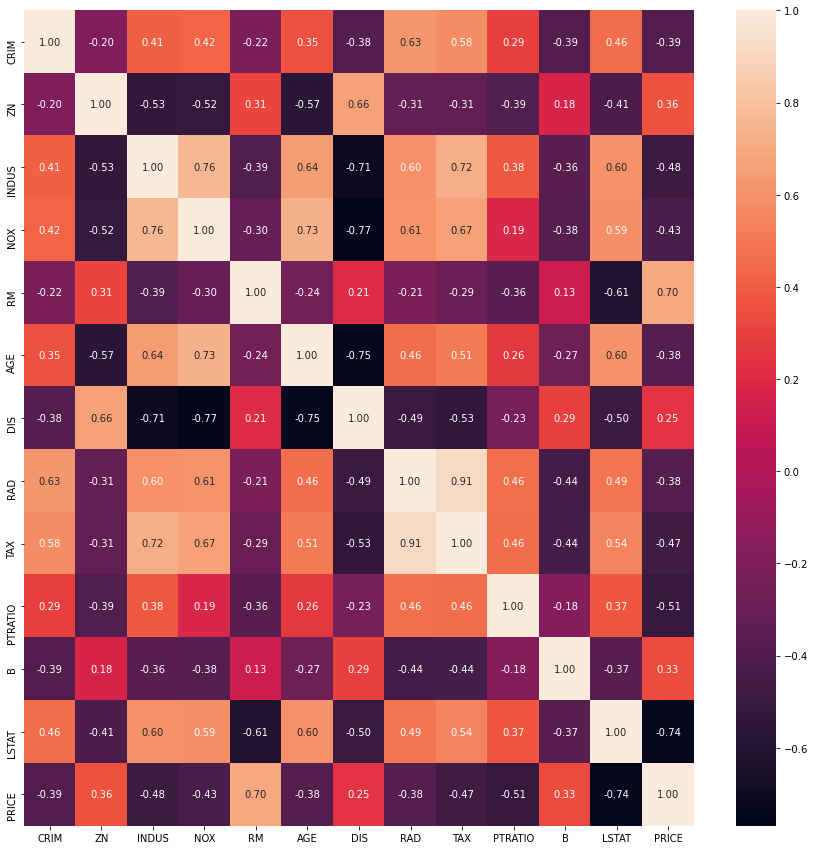

In [21]:
# Матрица корреляции для признаков
correlation_mtrx = df[np.append(feature_names, 'PRICE')].corr()
# Тепловая карта
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlation_mtrx, ax=ax, annot=True, fmt='.2f')

Из графика видно, что наибольшая корреляция - между TAX (уровень налогов) и RAD (индекс доступности КАД), значит, какой-то из этих признаков можно будет исключить. Также высокий уровень корреляции наблюдается между NOX (концентрация вредых веществ в воздухе) и INDUS (уровень нежилой застройки), INDUS и TAX, NOX и TAX. Высокий уровень отрицательной корреляции - между DIS (удаленность от деловых центров) и NOX, DIS и AGE, DIS и INDUS.

С целевой величиной - PRICE - наибольшую корреляцию имеют показатели RM (число комнат) и (отрицательную) - LSTAT (процентное соотношение низших слоев населения).

Отобразим зависимость между наиболее коррелирующими величинами - TAX и RAD

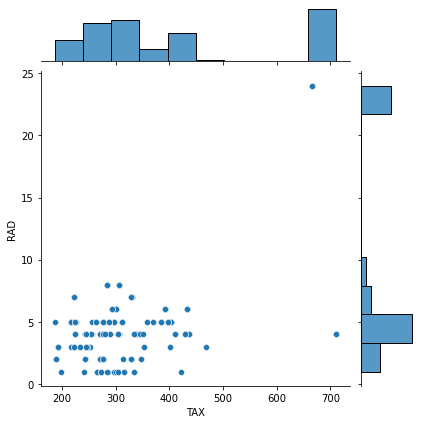

In [22]:
sns.jointplot(x="TAX", y="RAD", data=df)

Несмотря на высокое значение корреляции, на графике сложно определить однозначную зависимость между данными.

Рассмотрим зависимости цены от RM и от LSTAT

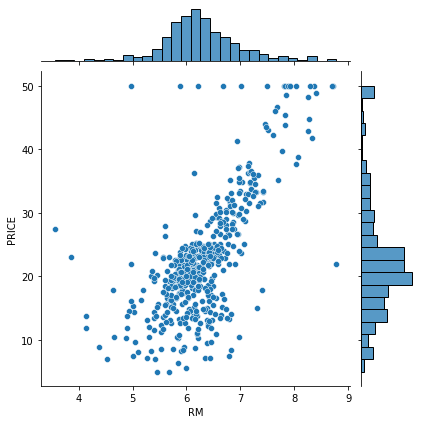

In [23]:
sns.jointplot(x="RM", y="PRICE", data=df)

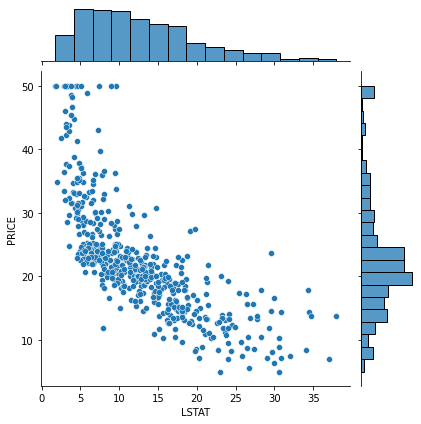

In [24]:
sns.jointplot(x="LSTAT", y="PRICE", data=df)

По графикам видна явная линейная зависимость между RM и PRICE, а также обратная зависимость вида 1/х между LSTAT и PRICE. Также на графике зависимости PRICE(RM) видны выбросы на уровне PRICE=50.

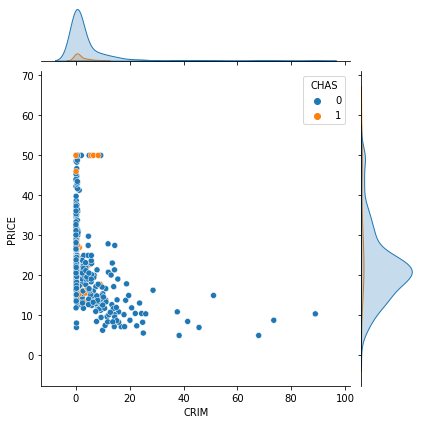

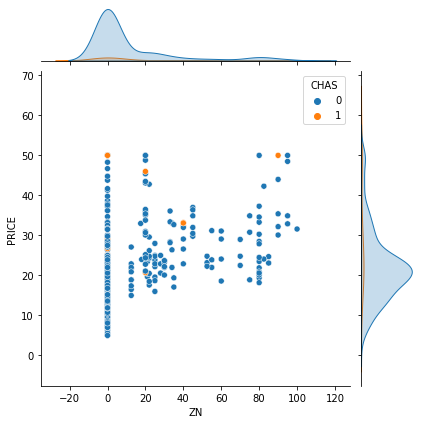

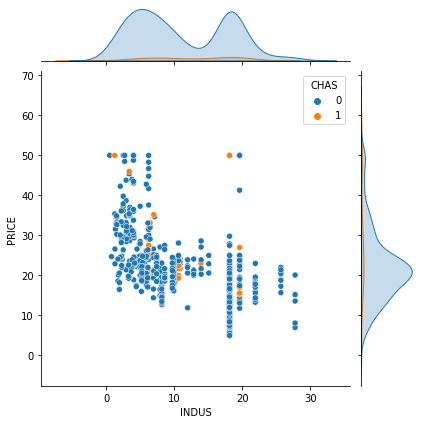

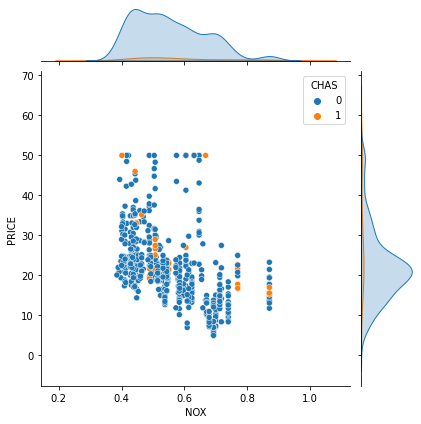

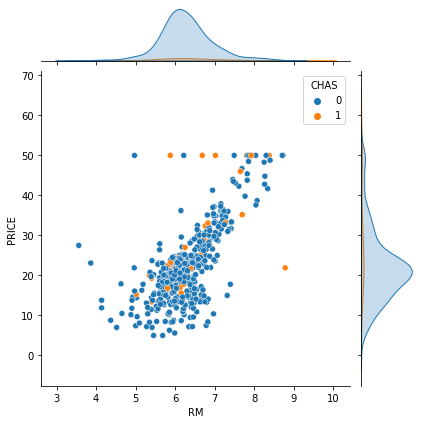

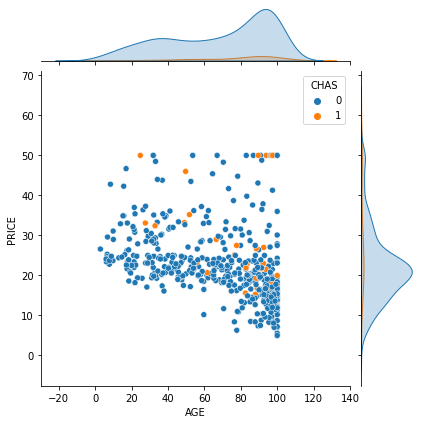

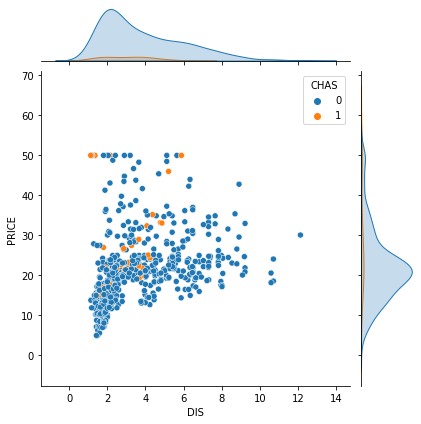

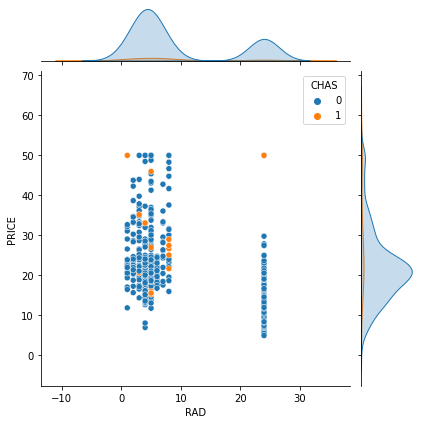

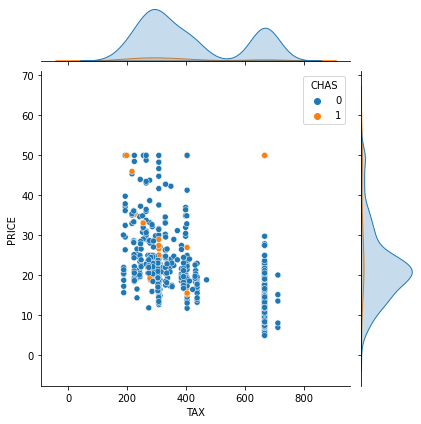

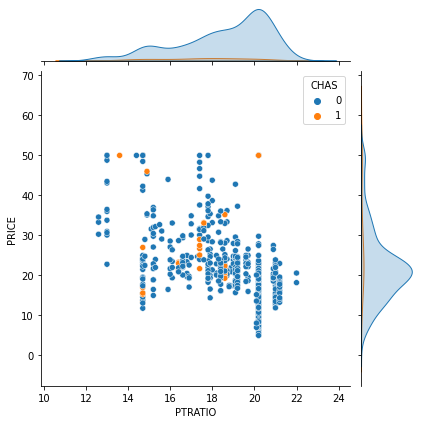

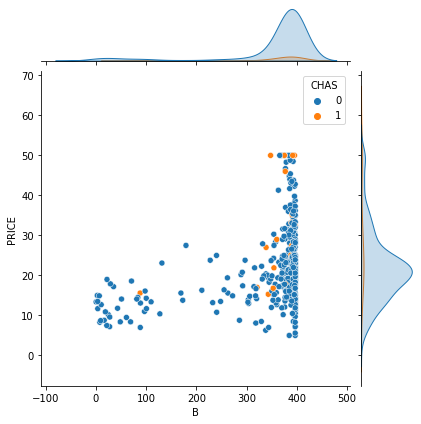

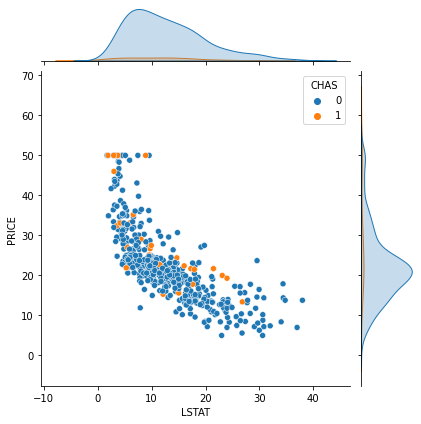

In [25]:
# Для отображения зависимостей PRICE от всех параметров уберем столбец CHAS
# и используем его как маркер
attributes = feature_names[np.argwhere(feature_names != 'CHAS')][:,0]
plot_data = df[np.append(attributes, 'PRICE')]

for attribute in attributes:
    sns.jointplot(x=attribute, y="PRICE", data=plot_data, hue=df["CHAS"])

Из графиков можно проследить следующие зависимости:
1) Цена резко падает при увеличении уровня преступности
2) Цена уменьшается при более высоком уровне нежилой застройки
3) Цена уменьшается при увеличении уровня загрязнения воздуха (что коррелирует с п.2 из-за корреляции данных между этими атрибутами)
4) Цена возрастает при увеличении числа комнат (что уже было рассмотрено)
5) Цена падает при увеличении процентного соотношения бедных слоев населения

Зависимости цены от остальных признаков проследить трудно.

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


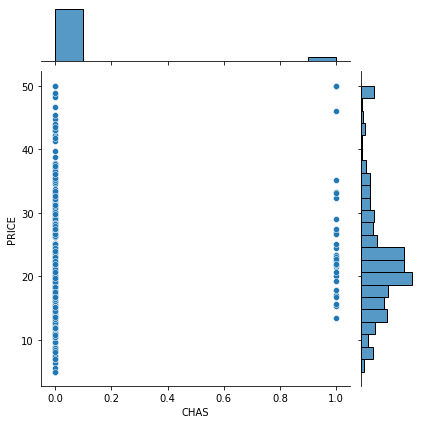

In [26]:
chas_data = df[np.array(["CHAS", "PRICE"])]
chas_data['CHAS'] = chas_data['CHAS'].astype(int)
sns.jointplot(x="CHAS", y="PRICE", data=chas_data)

Как видно из графика (и графиков выше), параметр CHAS (близость реки) не влияет на стоимость.

### Распределения признаков

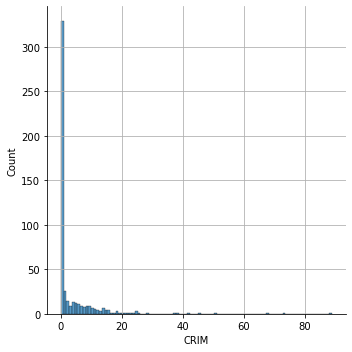

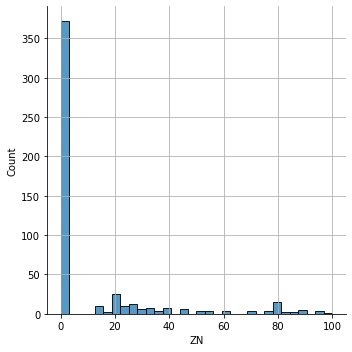

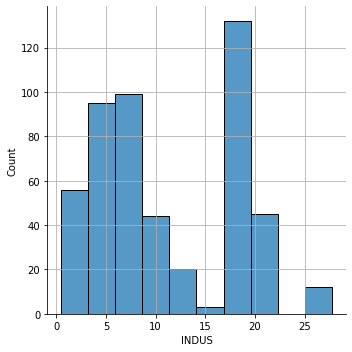

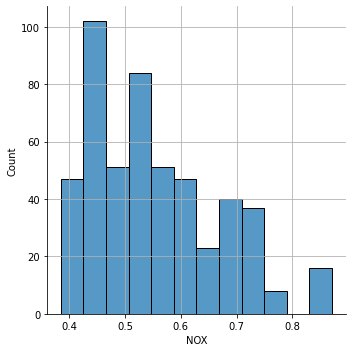

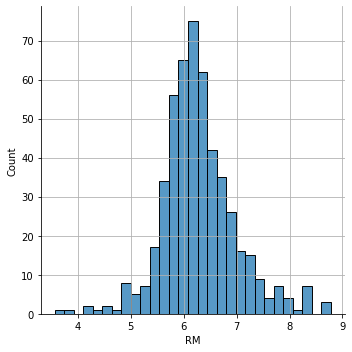

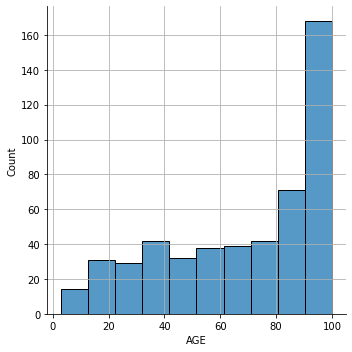

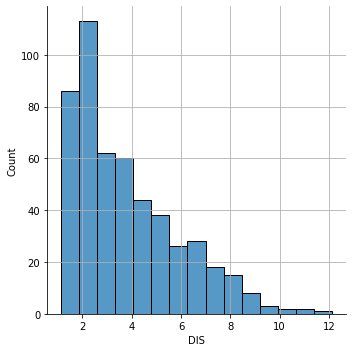

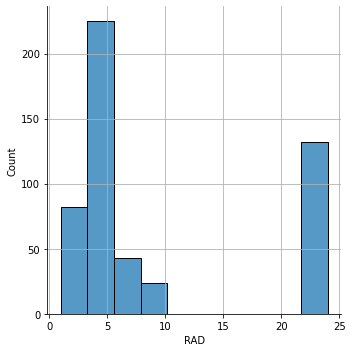

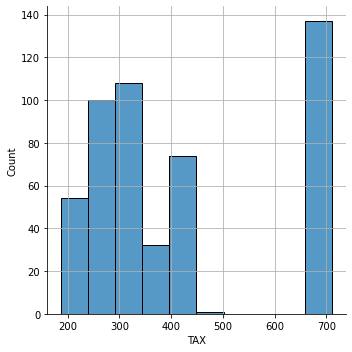

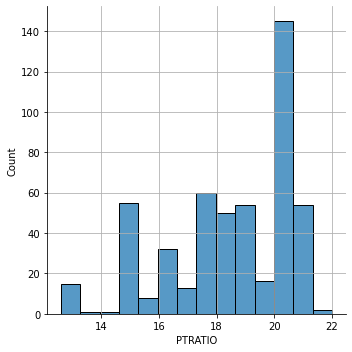

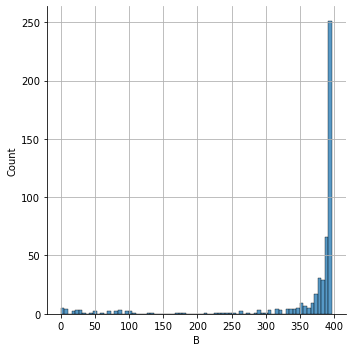

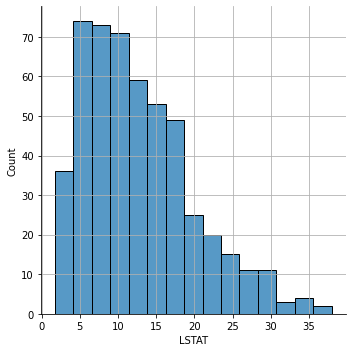

In [27]:
for attribute in attributes:
    sns.displot(df[attribute])
    plt.grid()

Как видно из графиков, только некоторые атрибуты имеют распределение, близкое к нормальному:
1) CRIM - с левым смещением
2) RM
3) AGE - с правым смещением
4) DIS - с левым
5) LSTAT - с левым
У остальных атрибутов наблюдается сложное распределение, часто не унимодальное.

## Применение инструментов нормализации данных

### Трансформер StandardScaler

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
reg_scaled = LinearRegression()

In [29]:
scaler_data = df[feature_names].to_numpy()
scaler.fit(scaler_data)
scaler_data = scaler.transform(scaler_data)
df_scaled = pd.DataFrame(scaler_data, columns=feature_names)
df_scaled["PRICE"] = target_data

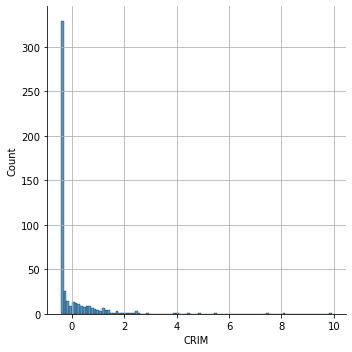

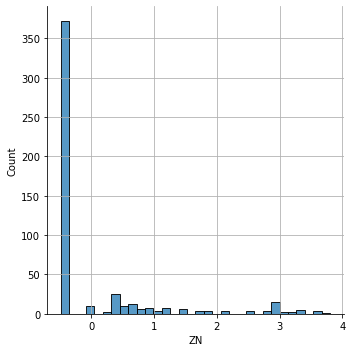

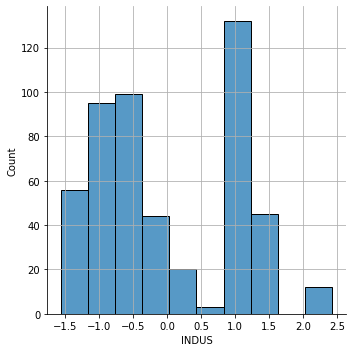

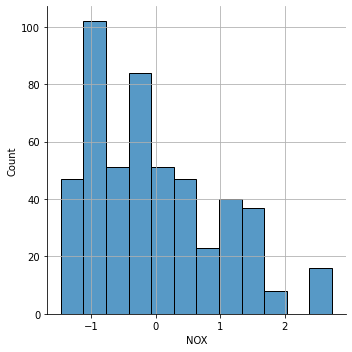

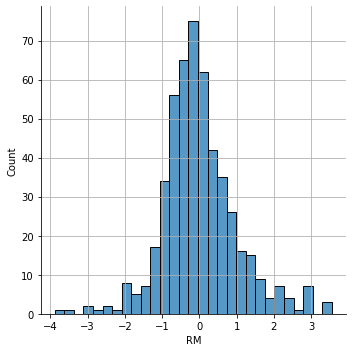

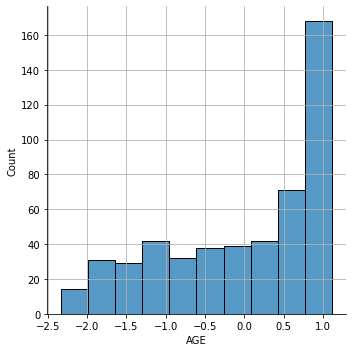

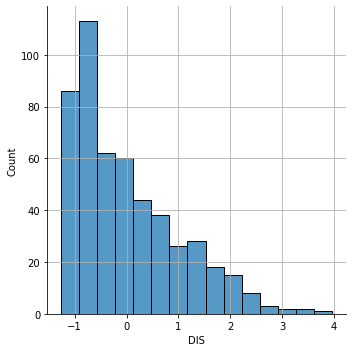

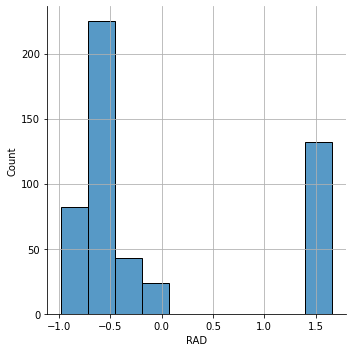

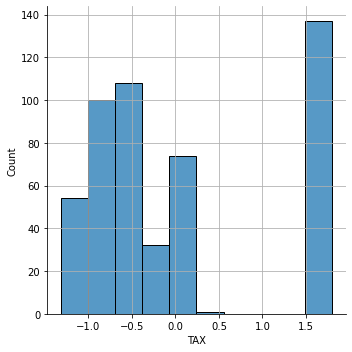

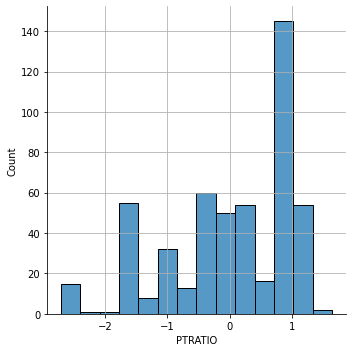

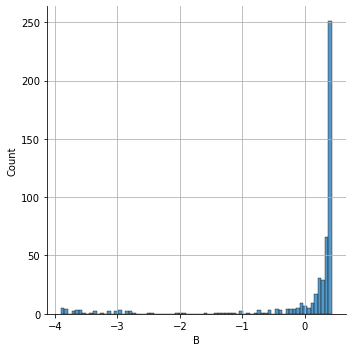

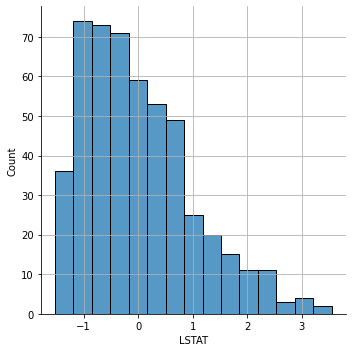

In [30]:
for attribute in attributes:
    sns.displot(df_scaled[attribute])
    plt.grid()

Обучим модель на нормированных данных и сравним метрики.

In [31]:
#Разделение выборки
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    df_scaled[feature_names],
    df_scaled['PRICE'], 
    train_size=0.7, 
    random_state=RANDOM_STATE
)

In [32]:
reg_scaled.fit(X_train_scaled, y_train)
show_linear_model_weights(reg_scaled, X_train.columns)


----- Weights -----
CRIM | -1.14691411297706
ZN | 0.8343260472084311
INDUS | 0.3394069444918741
CHAS | 0.7916361189986095
NOX | -1.7847269996533774
RM | 2.847839485832814
AGE | -0.30429305867253714
DIS | -2.9156252061568297
RAD | 2.1114004458631603
TAX | -1.4651995080953
PTRATIO | -1.9696346959069264
B | 1.0756777102275348
LSTAT | -3.9031072691193813
Bias: 22.50945471291038


Порядок весов стал одинаковым.

In [33]:
y_pred = reg.predict(X_test)
y_pred_scaled = reg_scaled.predict(X_test_scaled)

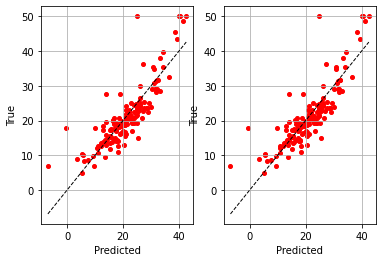

In [34]:
plt.subplot(1,2,1)
draw_predictions_plot(y_pred, y_test)
plt.subplot(1,2,2)
draw_predictions_plot(y_pred_scaled, y_test)

In [35]:
evaluate_regressor(reg, X_test, y_test, 'initial')
evaluate_regressor(reg_scaled, X_test_scaled, y_test_scaled, 'scaled')


----- Evaluation for initial -----
  R2: 0.7112260057484903
  RMSE: 4.6386899261728445
  MAE: 3.162709871457426

----- Evaluation for scaled -----
  R2: 0.7112260057484925
  RMSE: 4.638689926172827
  MAE: 3.1627098714574107


Показатели и графики не изменились

### Трансформер MinMaxScaler

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg_minmax = LinearRegression()

In [37]:
scaler_data = df[feature_names].to_numpy()
scaler.fit(scaler_data)
scaler_data = scaler.transform(scaler_data)
df_scaled = pd.DataFrame(scaler_data, columns=feature_names)
df_scaled["PRICE"] = target_data

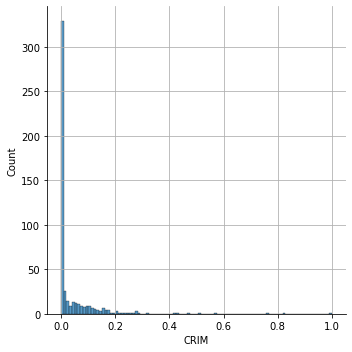

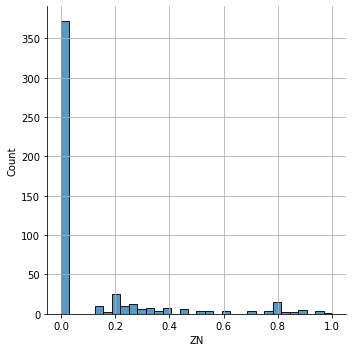

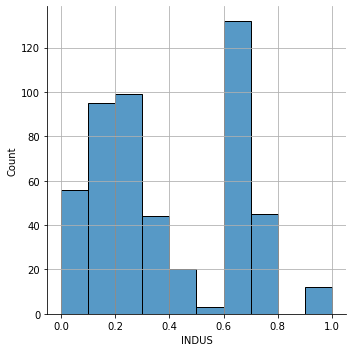

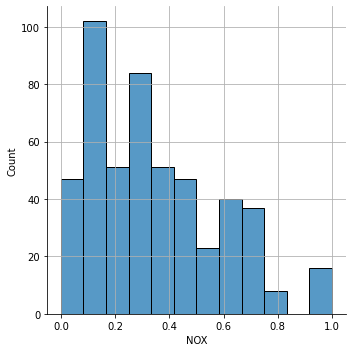

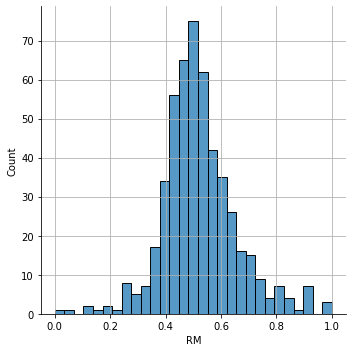

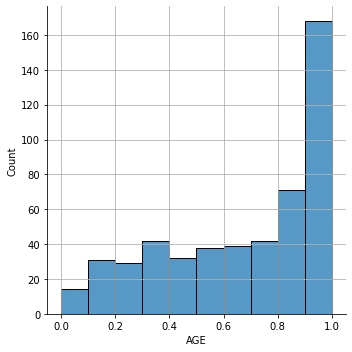

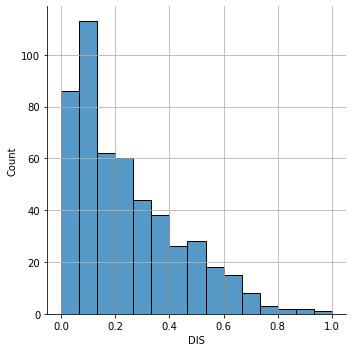

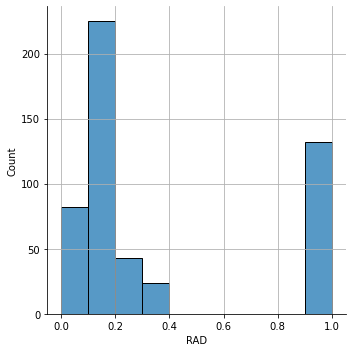

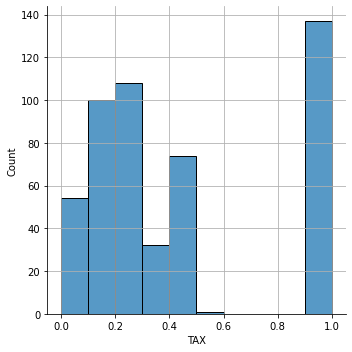

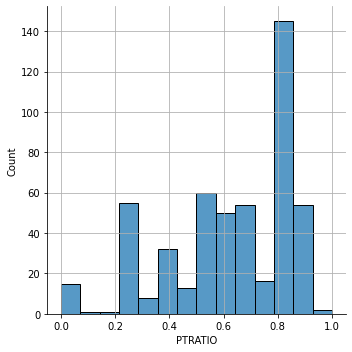

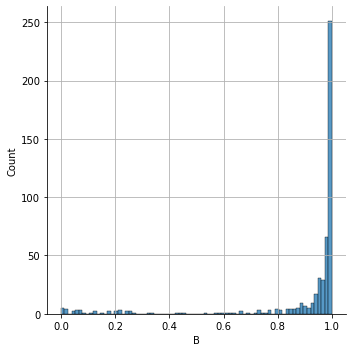

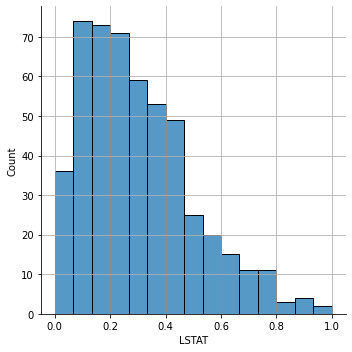

In [38]:
for attribute in attributes:
    sns.displot(df_scaled[attribute])
    plt.grid()

In [39]:
# Разделение выборки
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(
    df_scaled[feature_names],
    df_scaled['PRICE'], 
    train_size=0.7, 
    random_state=RANDOM_STATE
)

In [40]:
reg_minmax.fit(X_train_minmax, y_train_minmax)
show_linear_model_weights(reg_minmax, X_train.columns)


----- Weights -----
CRIM | -11.874819034414246
ZN | 3.5808913593233327
INDUS | 1.3509777616030967
CHAS | 3.1198351162853952
NOX | -7.49269159511909
RM | 21.17452278995726
AGE | -1.0507030964565403
DIS | -15.241684080215853
RAD | 5.582728815911726
TAX | -4.559970807607114
PTRATIO | -8.560440956236736
B | 4.677310480676524
LSTAT | -19.827386456740204
Bias: 24.766178880283604


Веса сильно изменились.

In [41]:
y_pred_minmax = reg_minmax.predict(X_test_minmax)

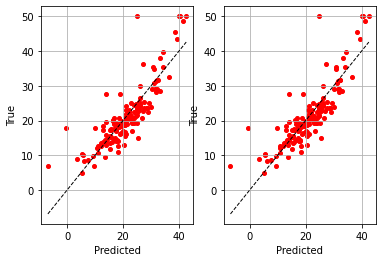

In [42]:
plt.subplot(1,2,1)
draw_predictions_plot(y_pred, y_test)
plt.subplot(1,2,2)
draw_predictions_plot(y_pred_minmax, y_test)

In [43]:
evaluate_regressor(reg, X_test, y_test, 'initial')
evaluate_regressor(reg_scaled, X_test_scaled, y_test, 'standart')
evaluate_regressor(reg_minmax, X_test_minmax, y_test, 'MinMax')


----- Evaluation for initial -----
  R2: 0.7112260057484903
  RMSE: 4.6386899261728445
  MAE: 3.162709871457426

----- Evaluation for standart -----
  R2: 0.7112260057484925
  RMSE: 4.638689926172827
  MAE: 3.1627098714574107

----- Evaluation for MinMax -----
  R2: 0.7112260057484925
  RMSE: 4.638689926172827
  MAE: 3.16270987145741


Показатели и графики не изменились

Таким образом, при нормализации данных модели имеют одинаковые метрики работы, но по весам можно определить "важность" атрибутов.

## Инструменты выравнивания распределений

### PowerTransformer

In [44]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()
reg_power = LinearRegression()

In [45]:
transformer_data = df[feature_names].to_numpy()
transformer.fit(scaler_data)
transformer_data = transformer.transform(transformer_data)
df_transformed = pd.DataFrame(transformer_data, columns=feature_names)
df_transformed["PRICE"] = target_data

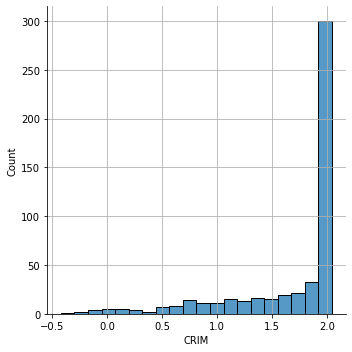

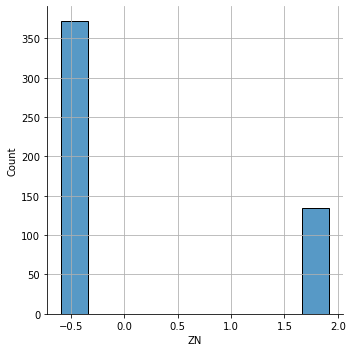

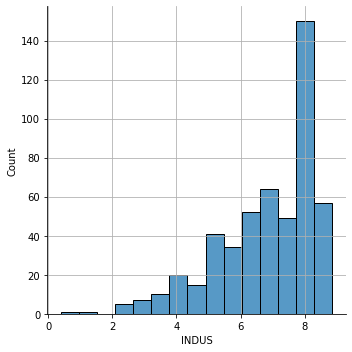

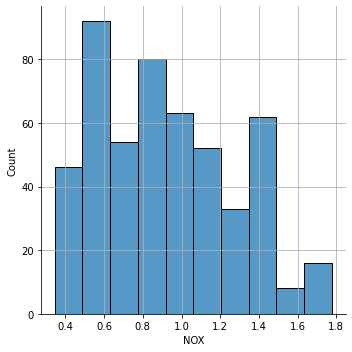

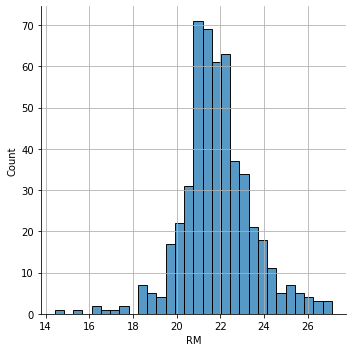

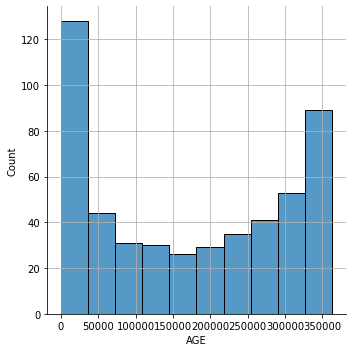

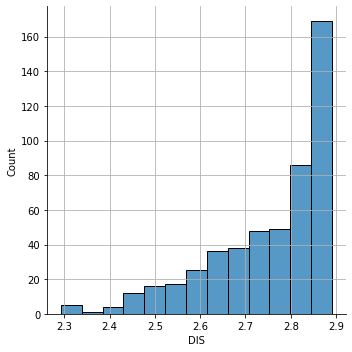

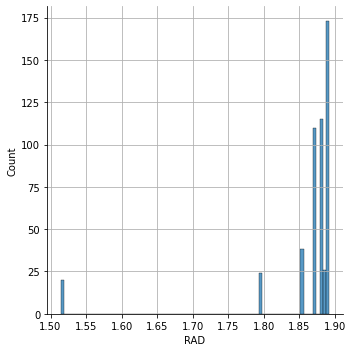

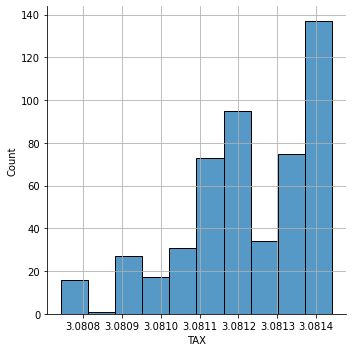

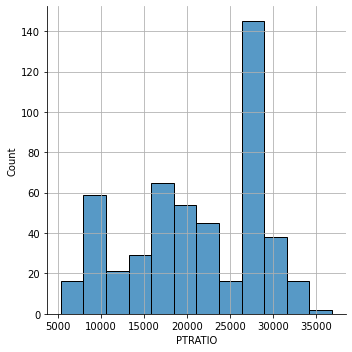

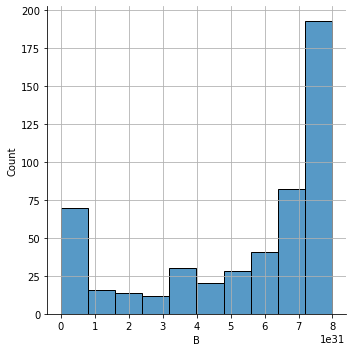

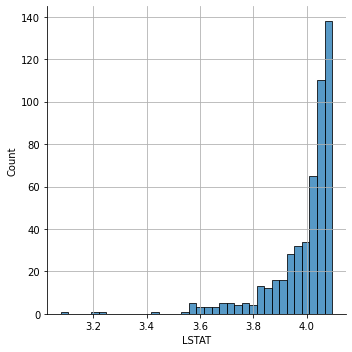

In [46]:
for attribute in attributes:
    sns.displot(df_transformed[attribute])
    plt.grid()

In [47]:
X_train_power, X_test_power, y_train_power, y_test_power = train_test_split(
    df_transformed[feature_names],
    df_transformed['PRICE'], 
    train_size=0.7, 
    random_state=RANDOM_STATE
)

In [48]:
reg_power.fit(X_train_power, y_train_power)
show_linear_model_weights(reg_power, X_train.columns)


----- Weights -----
CRIM | -4.531034152030859e-63
ZN | 0.0
INDUS | -9.328759211938501e-63
CHAS | -5.270572518234481e-64
NOX | -1.8560345276642238e-63
RM | 3.465307310363223e-63
AGE | -6.2204391648591756e-58
DIS | 5.525545421740865e-64
RAD | -3.428950948840227e-64
TAX | -6.251002358017579e-67
PTRATIO | -1.840862181249312e-59
B | 6.70706701057934e-32
LSTAT | -3.6304868832772516e-64
Bias: 19.3226706287711


In [49]:
y_pred_power = reg_power.predict(X_test_power)

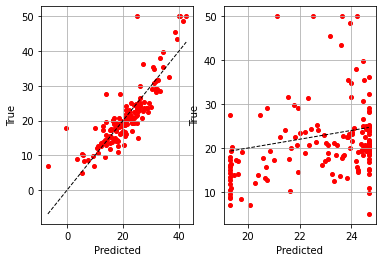

In [52]:
plt.subplot(1,2,1)
draw_predictions_plot(y_pred, y_test)
plt.subplot(1,2,2)
draw_predictions_plot(y_pred_power, y_test)

In [51]:
evaluate_regressor(reg, X_test, y_test, 'initial')
evaluate_regressor(reg_power, X_test_power, y_test, 'power')


----- Evaluation for initial -----
  R2: 0.7112260057484903
  RMSE: 4.6386899261728445
  MAE: 3.162709871457426

----- Evaluation for power -----
  R2: 0.06340698927934918
  RMSE: 8.353947840154628
  MAE: 6.16326633701192


хуйня какая-то, честно